In [1]:
#import pispec as pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm

/Users/boris/opt/anaconda3/lib/python3.7/site-packages/pispec-0.0-py3.7.egg/pispec/ct_database/case_1_040520


In [17]:
def find_nearests(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    if array[idx]>value:
        idxp =idx
        idxm = idx-1
    else:
        idxm = idx
        idxp = idx+1
    return (idxm,idxp)

from pkg_resources import resource_filename
import numpy as np
import re
from scipy.interpolate import interp1d
import os

case_id = "case_1_040520"

# this_dir, this_filename = os.path.split(__file__)
# DATA_PATH = os.path.join(this_dir, "data", "data.txt")
path_to_spectra = resource_filename("pispec","ct_database/"+case_id)
print(path_to_spectra)

Gamma_inj_min = 1e-17
Gamma_inj_max = 1e-8
N_Gamma_inj = 50
Gamma_values = np.logspace(np.log10(Gamma_inj_min),np.log10(Gamma_inj_max),N_Gamma_inj)

x_inj_min = 1e-6
x_inj_max = 1e6
N_x_inj = 200
x_inj_values = np.logspace(np.log10(x_inj_min),np.log10(x_inj_max),N_x_inj)


X_2d = []
DI_2d = []
finj_2d = []

for id_Gamma in range(N_Gamma_inj):
# for id_Gamma in range(1):
    Gi = Gamma_values[id_Gamma]
    str_gamma = str("%.3e"%Gi)

    #read x array
    x_ct = []
    filename = path_to_spectra + '/spectra_' + case_id + '_G_' + str_gamma + '_x_ct.txt'
    with open(filename) as f:
        for line in f:
            ls = line.strip()
            if ls:
                if "#" in ls:
                    continue
                else:
                    x_ct_p = []
                    l = re.split('\t',ls)
                    l = [e for e in l if e]
                    #print(l)
                    for s in l:
                        x_cti = float(s)
                        x_ct_p.append(x_cti)
                    x_ct_p = np.asarray(x_ct_p)
                x_ct.append(x_ct_p)


    #read DI array
    DI_ct = []
    filename = path_to_spectra + '/spectra_' + case_id + '_G_' + str_gamma + '_DI_ct.txt'
    with open(filename) as f:
        for line in f:
            ls = line.strip()
            if ls:
                if "#" in ls:
                    continue
                else:
                    DI_ct_p = []
                    l = re.split('\t',ls)
                    l = [e for e in l if e]
                    #print(l)
                    for s in l:
                        DI_cti = float(s)
                        DI_ct_p.append(DI_cti)
                    DI_ct_p = np.asarray(DI_ct_p)
                DI_ct.append(DI_ct_p*1e-6)



    finj_ct = []
    filename = path_to_spectra + '/spectra_' + case_id + '_G_' + str_gamma + '_finj_ct.txt'
    with open(filename) as f:
        for line in f:
            ls = line.strip()
            if ls:
                if "#" in ls:
                    continue
                else:
                    finj_ct_p = []
                    l = re.split('\t',ls)
                    l = [e for e in l if e]
                    #print(l)
                    for s in l:
                        finj_cti = float(s)
                        finj_ct_p.append(finj_cti)
                finj_ct.append(finj_ct_p)

    X_2d.append(x_ct)
    DI_2d.append(DI_ct)
    finj_2d.append(finj_ct)

/Users/boris/opt/anaconda3/lib/python3.7/site-packages/pispec-0.0-py3.7.egg/pispec/ct_database/case_1_040520


In [25]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
def GetSpectra(Gamma_inj_asked,x_inj_asked,x_asked):
    # print(Gamma_values)
    # print(x_inj_values)
    # print(find_nearests(Gamma_values, Gamma_inj_asked))
    id_gamma_low = find_nearests(Gamma_values, Gamma_inj_asked)[0]
    id_gamma_high = find_nearests(Gamma_values, Gamma_inj_asked)[1]

    id_xinj_low = find_nearests(x_inj_values, x_inj_asked)[0]
    id_xinj_high = find_nearests(x_inj_values, x_inj_asked)[1]

    #DI_2d[id_gamma_low][id_xinj_low]  #DI_2d[id_gamma_low][id_xinj_high]
    #X_2d[id_gamma_low][id_xinj_low]   #X_2d[id_gamma_low][id_xinj_high]

    #DI_2d[id_gamma_high][id_xinj_low]  #DI_2d[id_gamma_high][id_xinj_high]
    #X_2d[id_gamma_high][id_xinj_low]   #X_2d[id_gamma_high][id_xinj_high]
    S = [[X_2d[id_gamma_low][id_xinj_low],DI_2d[id_gamma_low][id_xinj_low]],[X_2d[id_gamma_low][id_xinj_high],DI_2d[id_gamma_low][id_xinj_high]],[X_2d[id_gamma_high][id_xinj_low],DI_2d[id_gamma_high][id_xinj_low]],[X_2d[id_gamma_high][id_xinj_high],DI_2d[id_gamma_high][id_xinj_high]]]
    F = [finj_2d[id_gamma_low][id_xinj_low],finj_2d[id_gamma_low][id_xinj_high],finj_2d[id_gamma_high][id_xinj_low],finj_2d[id_gamma_high][id_xinj_high]]
    
    dict = {
    "gamma_low": Gamma_values[id_gamma_low],
    "gamma_high": Gamma_values[id_gamma_high],
    "xinj_low": x_inj_values[id_xinj_low],
    "xinj_high": x_inj_values[id_xinj_high],
    "spectra": S,
    "finj": F
    }

    gamma_low = dict["gamma_low"]
    gamma_high = dict["gamma_high"]
    xinj_low = dict["xinj_low"]
    xinj_high = dict["xinj_high"]
    S = dict["spectra"]
    F = dict["finj"]
    #print(F)

    S_gamma_low_xinj_low = S[0]
    S_gamma_low_xinj_high = S[1]
    S_gamma_high_xinj_low = S[2]
    S_gamma_high_xinj_high = S[3]

    F_gamma_low_xinj_low = F[0][0]
    F_gamma_low_xinj_high = F[1][0]
    F_gamma_high_xinj_low = F[2][0]
    F_gamma_high_xinj_high = F[3][0]

    Gamma_asked = Gamma_inj_asked
    xinj_asked = x_inj_asked


    nx = int(5e3)


    ############### xinj_low
    new_x_min = np.maximum(np.min(S_gamma_low_xinj_low[0]),np.min(S_gamma_high_xinj_low[0]))
    new_x_max = np.minimum(np.max(S_gamma_low_xinj_low[0]),np.max(S_gamma_high_xinj_low[0]))
    new_x_array = np.logspace(np.log10(new_x_min),np.log10(new_x_max),nx)
    new_x_array = new_x_array[1:-1]

    f_gamma_low = interp1d(S_gamma_low_xinj_low[0], S_gamma_low_xinj_low[1])
    f_gamma_high = interp1d(S_gamma_high_xinj_low[0], S_gamma_high_xinj_low[1])

    new_S_gamma_low = f_gamma_low(new_x_array)
    new_S_gamma_high = f_gamma_high(new_x_array)

    #w = (gamma_high - Gamma_asked)/(gamma_high - gamma_low)
    w = (np.log(gamma_high) - np.log(Gamma_asked))/(np.log(gamma_high) - np.log(gamma_low))
    new_S_gamma_asked = w*new_S_gamma_low + (1.-w)*new_S_gamma_high



    S_gamma_asked_xinj_low = [[],[]]
    S_gamma_asked_xinj_low[0] = new_x_array
    S_gamma_asked_xinj_low[1] = new_S_gamma_asked

    F_gamma_asked_xinj_low = w*F_gamma_low_xinj_low + (1.-w)*F_gamma_high_xinj_low

    ############# xinj_high

    new_x_min = np.maximum(np.min(S_gamma_low_xinj_high[0]),np.min(S_gamma_high_xinj_high[0]))
    new_x_max = np.minimum(np.max(S_gamma_low_xinj_high[0]),np.max(S_gamma_high_xinj_high[0]))
    new_x_array = np.logspace(np.log10(new_x_min),np.log10(new_x_max),nx)
    new_x_array = new_x_array[1:-1]

    f_gamma_low = interp1d(S_gamma_low_xinj_high[0], S_gamma_low_xinj_high[1])
    f_gamma_high = interp1d(S_gamma_high_xinj_high[0], S_gamma_high_xinj_high[1])

    new_S_gamma_low = f_gamma_low(new_x_array)
    new_S_gamma_high = f_gamma_high(new_x_array)

    #w = (gamma_high - Gamma_asked)/(gamma_high - gamma_low)
    w = (np.log(gamma_high) - np.log(Gamma_asked))/(np.log(gamma_high) - np.log(gamma_low))
    new_S_gamma_asked = w*new_S_gamma_low + (1.-w)*new_S_gamma_high

    S_gamma_asked_xinj_high = [[],[]]
    S_gamma_asked_xinj_high[0] = new_x_array
    S_gamma_asked_xinj_high[1] = new_S_gamma_asked

    F_gamma_asked_xinj_high = w*F_gamma_low_xinj_low + (1.-w)*F_gamma_high_xinj_high

    ############# interpolation between xinjs
    new_x_min = np.maximum(np.min(S_gamma_asked_xinj_low[0]),np.min(S_gamma_asked_xinj_high[0]))
    new_x_max = np.minimum(np.max(S_gamma_asked_xinj_low[0]),np.max(S_gamma_asked_xinj_high[0]))
    new_x_array = np.logspace(np.log10(new_x_min),np.log10(new_x_max),nx)
    new_x_array = new_x_array[1:-1]

    f_xinj_low = interp1d(S_gamma_asked_xinj_low[0], S_gamma_asked_xinj_low[1])
    f_xinj_high = interp1d(S_gamma_asked_xinj_high[0], S_gamma_asked_xinj_high[1])

    new_S_xinj_low = f_xinj_low(new_x_array)
    new_S_xinj_high = f_xinj_high(new_x_array)

    #w = (xinj_high - xinj_asked)/(xinj_high - xinj_low)
    w = (np.log(xinj_high) - np.log(xinj_asked))/(np.log(xinj_high) - np.log(xinj_low))
    new_S_xinj_asked = w*new_S_xinj_low + (1.-w)*new_S_xinj_high

    S_gamma_asked_xinj_asked = [[],[]]
    S_gamma_asked_xinj_asked[0] = new_x_array
    S_gamma_asked_xinj_asked[1] = new_S_xinj_asked

    F_gamma_asked_xinj_asked = w*F_gamma_asked_xinj_low + (1.-w)*F_gamma_asked_xinj_high


    f_gamma_asked_xinj_asked = interp1d(S_gamma_asked_xinj_asked[0], S_gamma_asked_xinj_asked[1])
    ########### get spectra at required x values
    array_x_asked = np.asarray(x_asked)

    array_S_result = f_gamma_asked_xinj_asked(array_x_asked)

    r_dict = {"x":array_x_asked,
              "DI": array_S_result,
              "finj": F_gamma_asked_xinj_asked}

    return r_dict

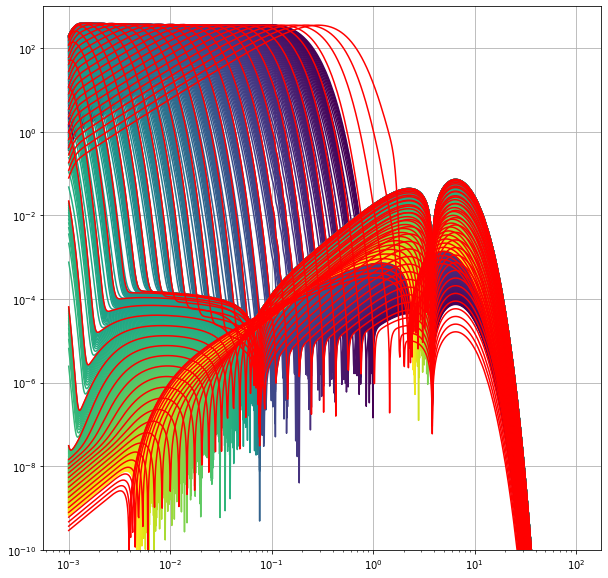

In [32]:

ngamma = 500
color=iter(cm.viridis(np.linspace(0,1,ngamma)))

x_asked = np.logspace(-3,2,1000)

xinj_asked = 1.626e+00

plt.subplots(1,1,figsize=(10,10))

for Gamma_asked in np.logspace(-16,-9,ngamma):
    
    S = GetSpectra(Gamma_asked,xinj_asked,x_asked)
    plt.plot(S["x"],np.abs(S["DI"])/S["finj"],c=next(color))
    #print(S["finj"])
    
for Gamma_asked in Gamma_values[2:-2]:
    S = GetSpectra(Gamma_asked,xinj_asked,x_asked)
    plt.plot(S["x"],np.abs(S["DI"])/S["finj"],c='r')
    
plt.loglog()
plt.ylim(1e-10,1e3)
plt.grid()

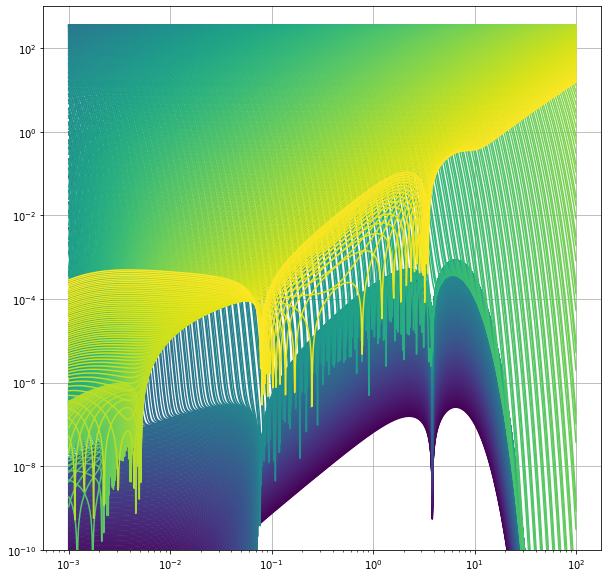

In [24]:

nxinj = 500
color=iter(cm.viridis(np.linspace(0,1,nxinj)))

x_asked = np.logspace(-3,2,1000)

Gamma_asked = 1e-15

plt.subplots(1,1,figsize=(10,10))

for xinj_asked in np.logspace(-5,5,nxinj):
    
    S = GetSpectra(Gamma_asked,xinj_asked,x_asked)
    plt.plot(S["x"],np.abs(S["DI"])/S["finj"],c=next(color))
    
    
plt.loglog()
plt.ylim(1e-10,1e3)
plt.grid()

In [3]:
gamma_low = r["gamma_low"]
gamma_high = r["gamma_high"]
xinj_low = r["xinj_low"]
xinj_high = r["xinj_high"]
S = r["spectra"]

In [4]:
S_gamma_low_xinj_low = S[0]
S_gamma_low_xinj_high = S[1]
S_gamma_high_xinj_low = S[2]
S_gamma_high_xinj_high = S[3]

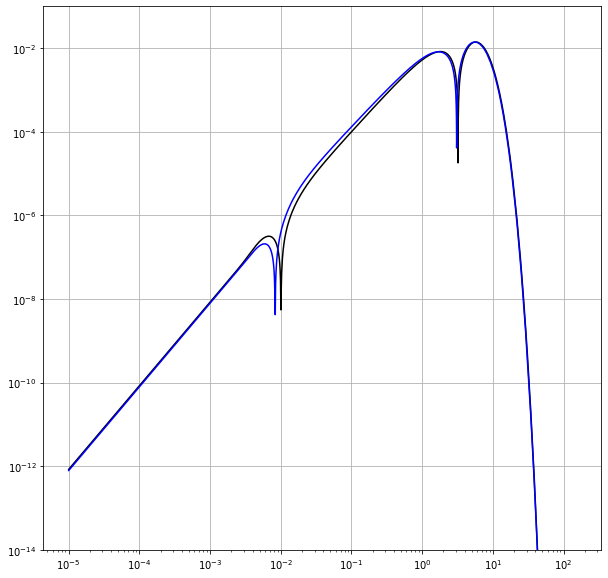

In [13]:
plt.subplots(1,1,figsize=(10,10))
plt.plot(S_gamma_low_xinj_low[0],np.abs(S_gamma_low_xinj_low[1]),c='k')
plt.plot(S_gamma_high_xinj_low[0],np.abs(S_gamma_high_xinj_low[1]),c='b')
plt.loglog()
plt.ylim(1e-14,1e-1)
plt.grid()

In [45]:
#nx = np.maximum(len(S_gamma_low_xinj_low[0]),len(S_gamma_high_xinj_low[0]))


In [57]:
nx = int(1e4)


############### xinj_low
new_x_min = np.maximum(np.min(S_gamma_low_xinj_low[0]),np.min(S_gamma_high_xinj_low[0]))
new_x_max = np.minimum(np.max(S_gamma_low_xinj_low[0]),np.max(S_gamma_high_xinj_low[0]))
new_x_array = np.logspace(np.log10(new_x_min),np.log10(new_x_max),nx)
new_x_array = new_x_array[1:-1]

f_gamma_low = interp1d(S_gamma_low_xinj_low[0], S_gamma_low_xinj_low[1])
f_gamma_high = interp1d(S_gamma_high_xinj_low[0], S_gamma_high_xinj_low[1])

new_S_gamma_low = f_gamma_low(new_x_array)
new_S_gamma_high = f_gamma_high(new_x_array)

w = (gamma_high - Gamma_asked)/(gamma_high - gamma_low)
new_S_gamma_asked = w*new_S_gamma_low + (1.-w)*new_S_gamma_high

S_gamma_asked_xinj_low = [[],[]]
S_gamma_asked_xinj_low[0] = new_x_array
S_gamma_asked_xinj_low[1] = new_S_gamma_asked

############# xinj_high

new_x_min = np.maximum(np.min(S_gamma_low_xinj_high[0]),np.min(S_gamma_high_xinj_high[0]))
new_x_max = np.minimum(np.max(S_gamma_low_xinj_high[0]),np.max(S_gamma_high_xinj_high[0]))
new_x_array = np.logspace(np.log10(new_x_min),np.log10(new_x_max),nx)
new_x_array = new_x_array[1:-1]

f_gamma_low = interp1d(S_gamma_low_xinj_high[0], S_gamma_low_xinj_high[1])
f_gamma_high = interp1d(S_gamma_high_xinj_high[0], S_gamma_high_xinj_high[1])

new_S_gamma_low = f_gamma_low(new_x_array)
new_S_gamma_high = f_gamma_high(new_x_array)

w = (gamma_high - Gamma_asked)/(gamma_high - gamma_low)
new_S_gamma_asked = w*new_S_gamma_low + (1.-w)*new_S_gamma_high

S_gamma_asked_xinj_high = [[],[]]
S_gamma_asked_xinj_high[0] = new_x_array
S_gamma_asked_xinj_high[1] = new_S_gamma_asked


############# interpolation between xinjs
new_x_min = np.maximum(np.min(S_gamma_asked_xinj_low[0]),np.min(S_gamma_asked_xinj_high[0]))
new_x_max = np.minimum(np.max(S_gamma_asked_xinj_low[0]),np.max(S_gamma_asked_xinj_high[0]))
new_x_array = np.logspace(np.log10(new_x_min),np.log10(new_x_max),nx)
new_x_array = new_x_array[1:-1]

f_xinj_low = interp1d(S_gamma_asked_xinj_low[0], S_gamma_asked_xinj_low[1])
f_xinj_high = interp1d(S_gamma_asked_xinj_high[0], S_gamma_asked_xinj_high[1])

new_S_xinj_low = f_xinj_low(new_x_array)
new_S_xinj_high = f_xinj_high(new_x_array)

w = (xinj_high - xinj_asked)/(xinj_high - xinj_low)
new_S_xinj_asked = w*new_S_xinj_low + (1.-w)*new_S_xinj_high

S_gamma_asked_xinj_asked = [[],[]]
S_gamma_asked_xinj_asked[0] = new_x_array
S_gamma_asked_xinj_asked[1] = new_S_xinj_asked

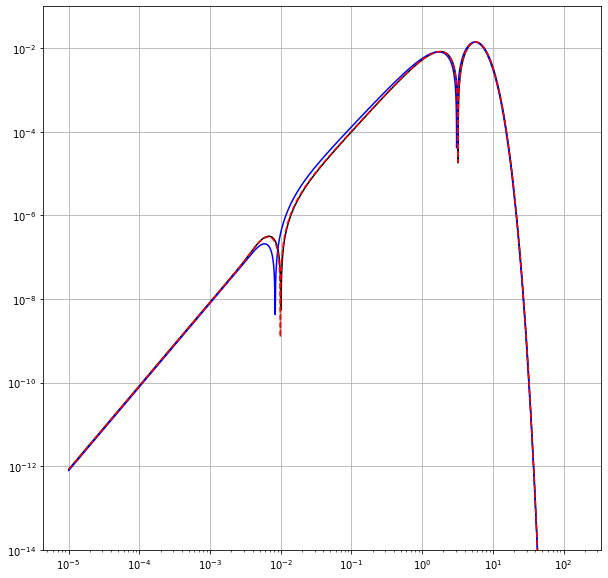

In [59]:
plt.subplots(1,1,figsize=(10,10))
plt.plot(S_gamma_low_xinj_low[0],np.abs(S_gamma_low_xinj_low[1]),c='k')
plt.plot(S_gamma_high_xinj_low[0],np.abs(S_gamma_high_xinj_low[1]),c='b')
#plt.plot(S_gamma_asked_xinj_low[0],np.abs(S_gamma_asked_xinj_low[1]),c='r')
plt.plot(S_gamma_asked_xinj_asked[0],np.abs(S_gamma_asked_xinj_asked[1]),c='r',ls='--')
plt.loglog()
plt.ylim(1e-14,1e-1)
plt.grid()

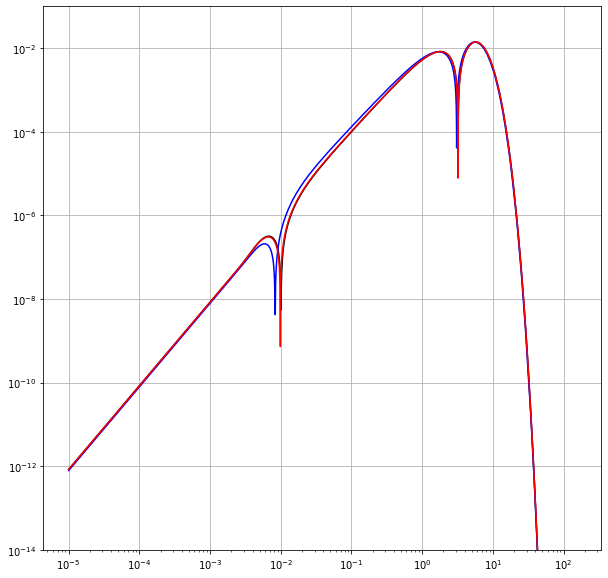

In [56]:
plt.subplots(1,1,figsize=(10,10))
plt.plot(S_gamma_low_xinj_high[0],np.abs(S_gamma_low_xinj_high[1]),c='k')
plt.plot(S_gamma_high_xinj_high[0],np.abs(S_gamma_high_xinj_high[1]),c='b')
plt.plot(S_gamma_asked_xinj_high[0],np.abs(S_gamma_asked_xinj_high[1]),c='r')
plt.loglog()
plt.ylim(1e-14,1e-1)
plt.grid()

In [42]:
S_gamma_low_xinj_low[0]

array([1.000e-05, 1.012e-05, 1.025e-05, ..., 1.490e+02, 1.495e+02,
       1.500e+02])

In [44]:
np.log10(new_x_min)

-5.0

In [60]:
np.asarray(1)

array(1)